<a href="https://colab.research.google.com/github/garry-p12/DSC240_HW3_Code/blob/main/DSC240_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 3

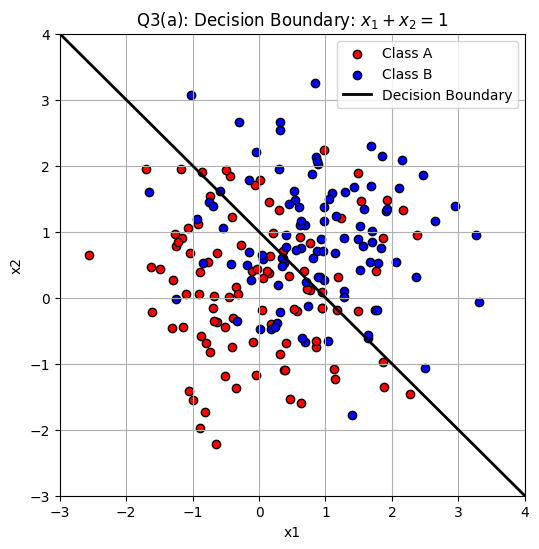

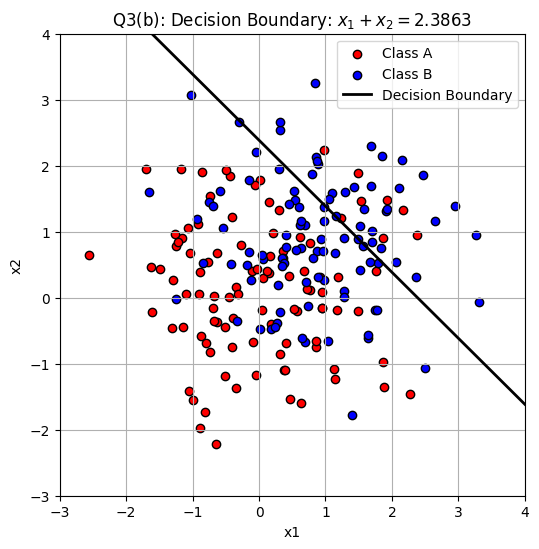

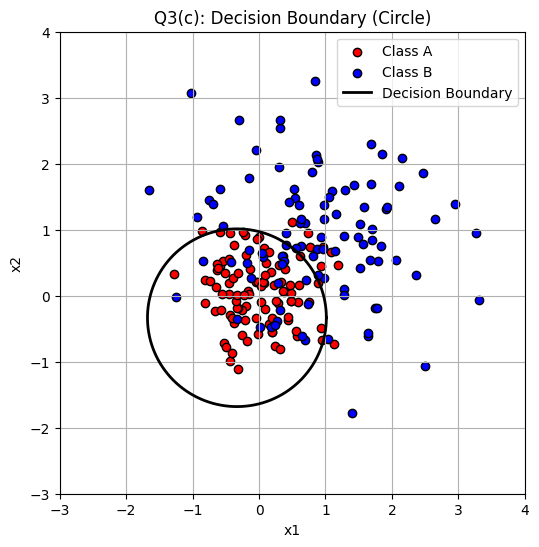

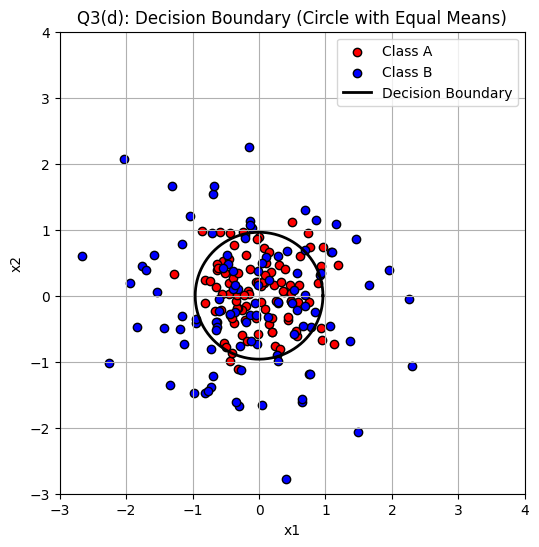

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary_line(decision_func, title, xlim=(-3, 4), ylim=(-3, 4)):
    """
    Plots a linear decision boundary given by decision_func: x -> y.
    """
    x = np.linspace(xlim[0], xlim[1], 400)
    y = decision_func(x)
    plt.figure(figsize=(6,6))
    plt.plot(x, y, 'k-', linewidth=2, label='Decision Boundary')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_decision_boundary_circle(center, radius, title, xlim=(-3, 4), ylim=(-3, 4)):
    """
    Plots a circular decision boundary given a center and radius.
    """
    theta = np.linspace(0, 2*np.pi, 400)
    x_circle = center[0] + radius*np.cos(theta)
    y_circle = center[1] + radius*np.sin(theta)
    plt.figure(figsize=(6,6))
    plt.plot(x_circle, y_circle, 'k-', linewidth=2, label='Decision Boundary')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_samples_and_line(mu1, cov1, mu2, cov2, decision_func, title, xlim=(-3,4), ylim=(-3,4)):
    """
    Generates samples from two Gaussian distributions and overlays a linear decision boundary.
    """
    np.random.seed(0)
    samples_A = np.random.multivariate_normal(mu1, cov1, 100)
    samples_B = np.random.multivariate_normal(mu2, cov2, 100)

    x = np.linspace(xlim[0], xlim[1], 400)
    y = decision_func(x)

    plt.figure(figsize=(6,6))
    plt.scatter(samples_A[:,0], samples_A[:,1], c='red', edgecolor='k', label='Class A')
    plt.scatter(samples_B[:,0], samples_B[:,1], c='blue', edgecolor='k', label='Class B')
    plt.plot(x, y, 'k-', linewidth=2, label='Decision Boundary')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_samples_and_circle(mu1, cov1, mu2, cov2, circle_center, circle_radius, title, xlim=(-3,4), ylim=(-3,4)):
    """
    Generates samples from two Gaussian distributions and overlays a circular decision boundary.
    """
    np.random.seed(0)
    samples_A = np.random.multivariate_normal(mu1, cov1, 100)
    samples_B = np.random.multivariate_normal(mu2, cov2, 100)

    theta = np.linspace(0, 2*np.pi, 400)
    x_circle = circle_center[0] + circle_radius*np.cos(theta)
    y_circle = circle_center[1] + circle_radius*np.sin(theta)

    plt.figure(figsize=(6,6))
    plt.scatter(samples_A[:,0], samples_A[:,1], c='red', edgecolor='k', label='Class A')
    plt.scatter(samples_B[:,0], samples_B[:,1], c='blue', edgecolor='k', label='Class B')
    plt.plot(x_circle, y_circle, 'k-', linewidth=2, label='Decision Boundary')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Question 3 (a): Equal Priors, Same Covariance
# Parameters: mu1 = [0,0], mu2 = [1,1], cov1 = cov2 = I
# Decision boundary: x1 + x2 = 1  =>  x2 = 1 - x1

plot_samples_and_line(mu1=[0,0], cov1=np.eye(2),
                      mu2=[1,1], cov2=np.eye(2),
                      decision_func=lambda x: 1 - x,
                      title='Q3(a): Decision Boundary: $x_1 + x_2 = 1$')


# Question 3 (b): Unequal Priors
# Parameters: mu1 = [0,0], mu2 = [1,1], cov1 = cov2 = I, p = 0.8
# Decision boundary: x1 + x2 = 2.3863  =>  x2 = 2.3863 - x1

plot_samples_and_line(mu1=[0,0], cov1=np.eye(2),
                      mu2=[1,1], cov2=np.eye(2),
                      decision_func=lambda x: 2.3863 - x,
                      title='Q3(b): Decision Boundary: $x_1 + x_2 = 2.3863$')


# Question 3 (c): Different Covariances
# Parameters: mu1 = [0,0], cov1 = 0.25*I, mu2 = [1,1], cov2 = I.
# Decision boundary derived: a circle with center (-1/3, -1/3) and radius sqrt(1.8131) ≈ 1.35

plot_samples_and_circle(mu1=[0,0], cov1=0.25*np.eye(2),
                        mu2=[1,1], cov2=np.eye(2),
                        circle_center=(-1/3, -1/3),
                        circle_radius=np.sqrt(1.8131),
                        title='Q3(c): Decision Boundary (Circle)')


# Question 3 (d): Equal Means with Different Covariances
# Parameters: mu1 = mu2 = [0,0], cov1 = 0.25*I, cov2 = I.
# Decision boundary: a circle centered at (0,0) with radius sqrt(0.9242) ≈ 0.96

plot_samples_and_circle(mu1=[0,0], cov1=0.25*np.eye(2),
                        mu2=[0,0], cov2=np.eye(2),
                        circle_center=(0, 0),
                        circle_radius=np.sqrt(0.9242),
                        title='Q3(d): Decision Boundary (Circle with Equal Means)')


## Question 4

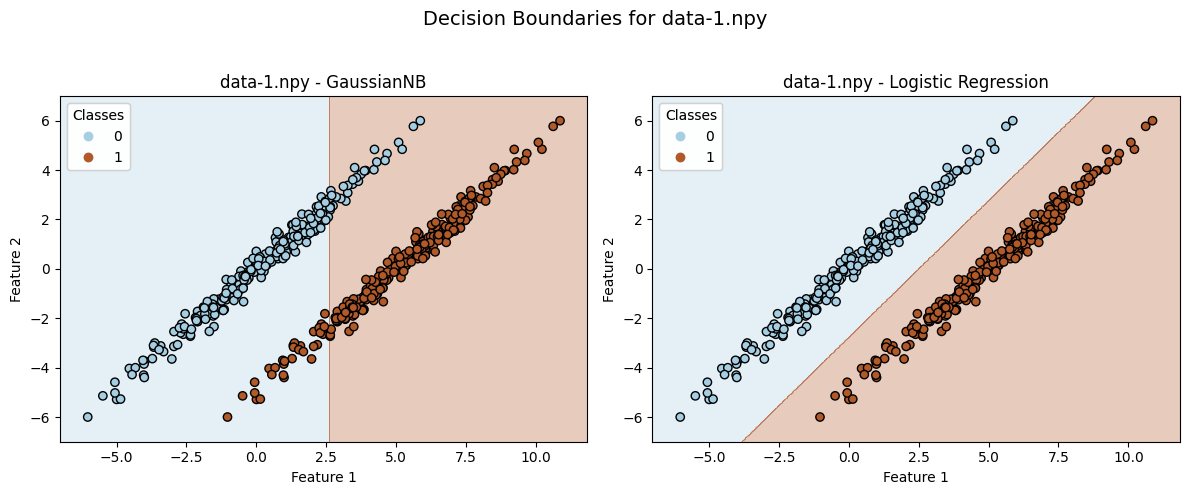

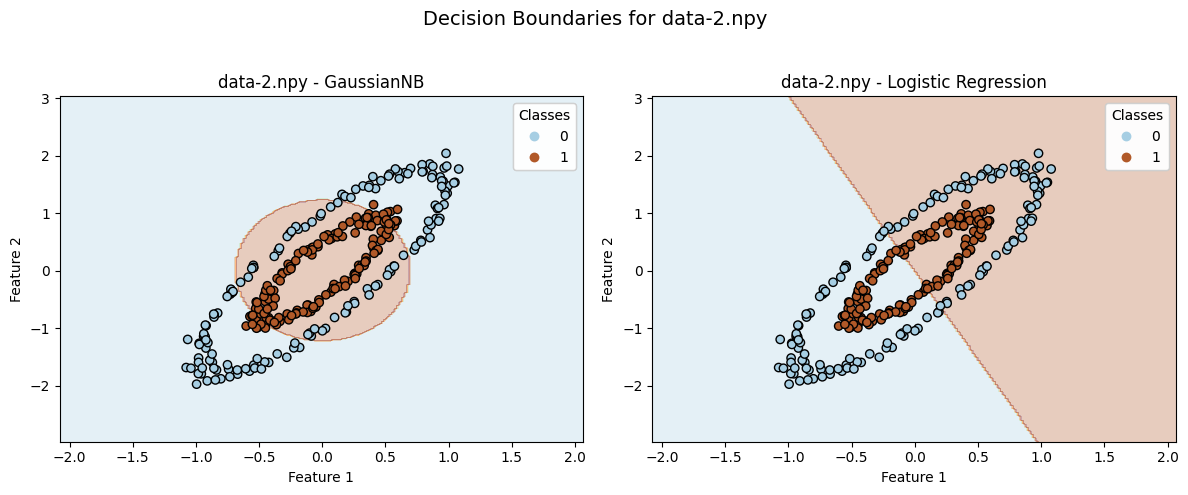

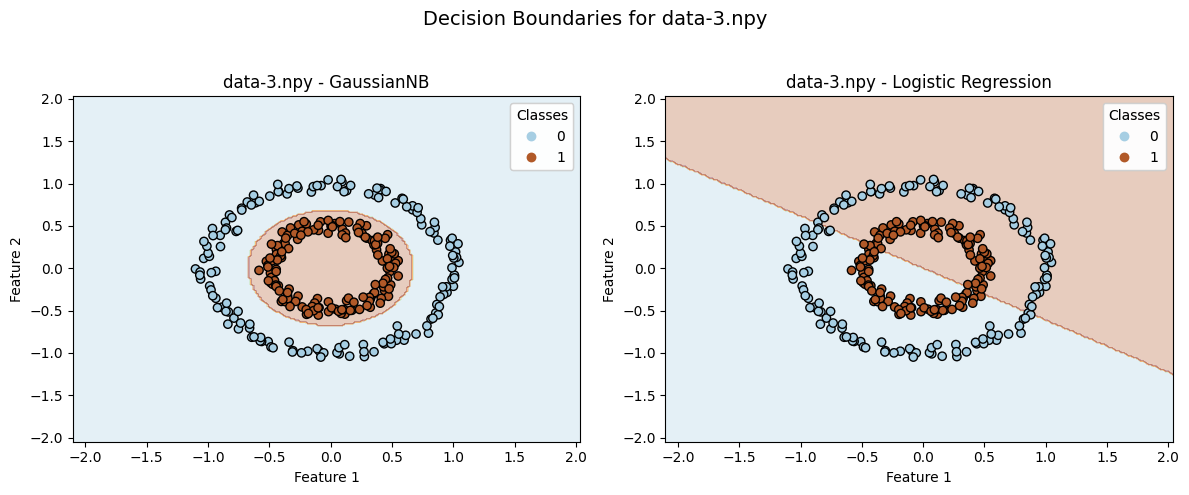

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def plot_decision_boundaries(X, y, classifier, ax, title, grid_step=0.02):
    """
    Plots the decision boundary for a given classifier on the provided axes.

    Parameters:
        X (np.array): Feature matrix (n_samples x 2).
        y (np.array): Labels vector.
        classifier: Trained classifier with a predict() method.
        ax (matplotlib.axes): Axes object for plotting.
        title (str): Title of the plot.
        grid_step (float): Resolution of the mesh grid.
    """
    # Determine the bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid over the feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # Predict the classifier output for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Plot the actual data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    # Optionally add a legend for the classes
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

def process_dataset(data_file):
    """
    Loads a dataset, fits Gaussian Naive Bayes and logistic regression classifiers,
    and plots the decision boundaries for both.

    Parameters:
        data_file (str): Filename of the .npy dataset.
    """
    # Load dataset
    data = np.load(data_file)
    X = data[:, :2]  # first two columns: features
    y = data[:, 2]   # last column: labels

    # Fit classifiers
    gnb = GaussianNB()
    gnb.fit(X, y)

    lr = LogisticRegression()
    lr.fit(X, y)

    # Create subplots to display the decision boundaries side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Decision Boundaries for {data_file}', fontsize=14)

    # Plot Gaussian Naive Bayes decision boundary
    plot_decision_boundaries(X, y, gnb, axes[0], f'{data_file} - GaussianNB')

    # Plot Logistic Regression decision boundary
    plot_decision_boundaries(X, y, lr, axes[1], f'{data_file} - Logistic Regression')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    # List of dataset filenames
    dataset_files = ['data-1.npy', 'data-2.npy', 'data-3.npy']

    # Process each dataset individually
    for file in dataset_files:
        process_dataset(file)
